<a href="https://colab.research.google.com/github/ustab/CAPS_PROJECT-11-22-DS-F1218-B-USTA/blob/main/DAwPy_Capstone_Project_(AutoScout)_Student_(1_DATA_CLEANING_F_1218_B_USTA)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

# PART- 1 ( Data Cleaning )

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

In [199]:
pip install skimpy --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [200]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("darkgrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [201]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [202]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json
%matplotlib inline

In [203]:
df=pd.read_json('/content/scout_car.json', lines=True)
df.head()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [205]:
columns=df.columns
columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

#correcting columns's names:

In [206]:
df.rename(columns={"\nComfort & Convenience\n": "Comfort_Convenience",
                   "\nEntertainment & Media\n":"Entertainment_Media",
                   "\nExtras\n":"Extras",
                   "\nSafety & Security\n":"Safety_Security"}, inplace=True)

columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

first one is not working, so I used next one.

In [207]:
df.rename(columns={'Previous Owners':'Previous_Owners', 'Next Inspection':'Next_Inspection', 'Inspection new':'Inspection_new','Full Service':'Full-Service', 'Non-smoking Vehicle':'Non_smoking_Vehicle',
       'Offer Number':'Offer_Number', 'First Registration': 'First_Registration', 'Body Color':'Body_Color', 'Paint Type':'Paint_Type',
       'Body Color Original': 'Body_Color_Original', 'Nr. of Doors':'Nr._of_Doors', 'Nr. of Seats': 'Nr._of_Seats', 'Model Code':'Model_Code', 'Gearing Type': 'Gearing_Type','Drive chain':'Drive_chain', 'CO2 Emission':'CO2_Emission',
      'Emission Class':'Emission_Class', 'Emission Label':'Emission_Label', 'Country version':'Country_version', 'Electricity consumption':'Electricity_consumption',
       'Last Service Date':'Last_Service_Date', 'Other Fuel Types':'Other_Fuel_Types', 'Last Timing Belt Service Date':'Last_Timing_Belt_Service_Date', 'Available from':'Available_from'}, inplace=True)

df.columns


Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous_Owners', 'Next_Inspection', 'Inspection_new', 'Warranty',
       'Full-Service', 'Non_smoking_Vehicle', 'null', 'Make', 'Model',
       'Offer_Number', 'First_Registration', 'Body_Color', 'Paint_Type',
       'Body_Color_Original', 'Upholstery', 'Body', 'Nr._of_Doors',
       'Nr._of_Seats', 'Model_Code', 'Gearing_Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive_chain', 'Fuel', 'Consumption',
       'CO2_Emission', 'Emission_Class', 'Comfort_Convenience',
       'Entertainment_Media', 'Extras', 'Safety_Security', 'description',
       'Emission_Label', 'Gears', 'Country_version', 'Electricity_consumption',
       'Last_Service_Date', 'Other_Fuel_Types', 'Availability',
       'Last_Timing_Belt_Service_Date', 'Available_from'],
      dtype='object')

In [208]:
df.head().T

,0,1,2,3,4
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,1.4 TDi Design S tronic,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,None,None
km,"56,013 km","80,000 km","83,450 km","73,000 km","16,200 km"
registration,01/2016,03/2017,02/2016,08/2016,05/2016
prev_owner,2 previous owners,None,1 previous owner,1 previous owner,1 previous owner
kW,NaN,NaN,NaN,NaN,NaN


In [209]:
df.shape

(15919, 54)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous_Owners                9279 non-null  

In [211]:
df.isnull().sum().sum()

262023

In [212]:
df.isnull().sum()*100 / df.shape[0] 

url                               0.00
make_model                        0.00
short_description                 0.29
body_type                         0.38
price                             0.00
vat                              28.35
km                                0.00
registration                      0.00
prev_owner                       42.89
kW                              100.00
hp                                0.00
Type                              0.01
Previous_Owners                  41.71
Next_Inspection                  77.79
Inspection_new                   75.30
Warranty                         34.05
Full-Service                     48.39
Non_smoking_Vehicle              54.92
null                              0.00
Make                              0.00
Model                             0.00
Offer_Number                     19.94
First_Registration               10.03
Body_Color                        3.75
Paint_Type                       36.26
Body_Color_Original      

In [213]:
def df_nans(df, limit):
    missing = df.isnull().sum()*100 / df.shape[0]
    return missing.loc[lambda x : x >= limit]

def column_nans(serial):
    # display percentage of nans in a Series
    return serial.isnull().sum()*100 / serial.shape[0]

In [214]:
df_nans(df, 90)

kW                              100.00
Electricity_consumption          99.14
Last_Service_Date                96.44
Other_Fuel_Types                 94.47
Availability                     96.01
Last_Timing_Belt_Service_Date    99.90
Available_from                   98.29
dtype: float64

In [215]:
column_nans(df["Last_Timing_Belt_Service_Date"])

99.89949117406873

In [216]:
drop_columns = df_nans(df, 90).index
drop_columns

Index(['kW', 'Electricity_consumption', 'Last_Service_Date',
       'Other_Fuel_Types', 'Availability', 'Last_Timing_Belt_Service_Date',
       'Available_from'],
      dtype='object')

In [217]:
df.drop(drop_columns, axis=1, inplace=True)

In [218]:
df.drop("null", axis=1, inplace=True)

In [219]:
df.head()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,hp,Type,Previous_Owners,Next_Inspection,Inspection_new,Warranty,Full-Service,Non_smoking_Vehicle,Make,Model,Offer_Number,First_Registration,Body_Color,Paint_Type,Body_Color_Original,Upholstery,Body,Nr._of_Doors,Nr._of_Seats,Model_Code,Gearing_Type,Displacement,Cylinders,Weight,Drive_chain,Fuel,Consumption,CO2_Emission,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,description,Emission_Label,Gears,Country_version
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...","[\nAudi 

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   url                  15919 non-null  object
 1   make_model           15919 non-null  object
 2   short_description    15873 non-null  object
 3   body_type            15859 non-null  object
 4   price                15919 non-null  int64 
 5   vat                  11406 non-null  object
 6   km                   15919 non-null  object
 7   registration         15919 non-null  object
 8   prev_owner           9091 non-null   object
 9   hp                   15919 non-null  object
 10  Type                 15917 non-null  object
 11  Previous_Owners      9279 non-null   object
 12  Next_Inspection      3535 non-null   object
 13  Inspection_new       3932 non-null   object
 14  Warranty             10499 non-null  object
 15  Full-Service         8215 non-null   object
 16  Non_

In [221]:
df.url.value_counts(dropna=False)

https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e                  1
https://www.autoscout24.com//offers/opel-insignia-bus-inno-2-0-cdti-aut-navi-bi-xe-led-e6-diesel-black-8710b253-dd98-4ed0-9d46-cbad2d79532b                1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-10b7463b-9f56-4348-af35-df3432b2b585    1
https://www.autoscout24.com//offers/opel-insignia-2-0cdti-st-business-innovation-navi-bt-diesel-black-ba5a3368-dedc-4e51-9127-3976b26e93c2                 1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-7b52f054-78d3-4d5e-9370-8a7d081d7edd    1
                                                                                                                                                          ..
https://www.autoscout24.com//offers/audi-a3-sb-30-1-6-tdi-

In [222]:
df.drop("url", axis=1, inplace=True)

lets seperate as model:

In [223]:
df.make_model.value_counts(dropna=False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [224]:
df.Make.value_counts(dropna=False)

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: Make, dtype: int64

In [225]:
df["Make"] = df.Make.str.strip('\n')

In [226]:
df.Make.value_counts(dropna=False)

Opel       7343
Audi       5712
Renault    2864
Name: Make, dtype: int64

In [227]:
df.Model.value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: Model, dtype: int64

In [228]:
df.Model.astype("str").value_counts(dropna=False)

['\n', 'A3', '\n']          3097
['\n', 'A1', '\n']          2614
['\n', 'Insignia', '\n']    2598
['\n', 'Astra', '\n']       2526
['\n', 'Corsa', '\n']       2219
['\n', 'Clio', '\n']        1839
['\n', 'Espace', '\n']       991
['\n', 'Duster', '\n']        34
['\n', 'A2', '\n']             1
Name: Model, dtype: int64

In [229]:
df["Model"][0]

['\n', 'A1', '\n']

In [230]:
df["Model"][0][1]

'A1'

In [231]:
df["Model"].apply(lambda x: x[1])

0            A1
1            A1
2            A1
3            A1
4            A1
          ...  
15914    Espace
15915    Espace
15916    Espace
15917    Espace
15918    Espace
Name: Model, Length: 15919, dtype: object

In [232]:
df.Model.str[1]

0            A1
1            A1
2            A1
3            A1
4            A1
          ...  
15914    Espace
15915    Espace
15916    Espace
15917    Espace
15918    Espace
Name: Model, Length: 15919, dtype: object

In [233]:
df["Model"] = df.Model.str[1]

In [234]:
df.Model.value_counts(dropna=False)

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: Model, dtype: int64

In [235]:
df.drop(["Make", "Model"], axis=1, inplace=True)

In [236]:
df.short_description.value_counts(dropna=False)

SPB 1.6 TDI 116 CV S tronic Sport                 64
NaN                                               46
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: short_description, Length: 10002, dtype: int64

In [237]:
df.drop("short_description", axis=1, inplace=True)

In [238]:
df['description']

0        [\n, Sicherheit:,  , Deaktivierung für Beifahr...
1        [\nLangstreckenfahrzeug daher die hohe Kilomet...
2        [\n, Fahrzeug-Nummer: AM-95365,  , Ehem. UPE 2...
3        [\nAudi A1: , - 1e eigenaar , - Perfecte staat...
4        [\n, Technik & Sicherheit:, Xenon plus, Klimaa...
                               ...                        
15914    [\nVettura visionabile nella sede in Via Roma ...
15915    [\nDach: Panorama-Glas-Schiebedach, Lackierung...
15916    [\n, Getriebe:,  Automatik, Technik:,  Bordcom...
15917    [\nDEK:[2691331], Renault Espace Blue dCi 200C...
15918    [\n, Sicherheit Airbags:,  , Seitenairbag,  , ...
Name: description, Length: 15919, dtype: object

In [239]:
df['description'].astype('str').value_counts(dropna=False)

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [240]:
df.body_type.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [241]:
df.Body.astype('str').value_counts(dropna=False)

['\n', 'Sedans', '\n']           7903
['\n', 'Station wagon', '\n']    3553
['\n', 'Compact', '\n']          3153
['\n', 'Van', '\n']               783
['\n', 'Other', '\n']             290
['\n', 'Transporter', '\n']        88
nan                                60
['\n', 'Off-Road', '\n']           56
['\n', 'Coupe', '\n']              25
['\n', 'Convertible', '\n']         8
Name: Body, dtype: int64

In [242]:
df.drop("Body", axis = 1, inplace = True)

In [243]:
df.price.value_counts(dropna=False)

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64

In [244]:
df.price.isnull().sum()

0

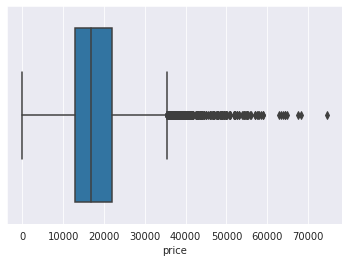

In [245]:
sns.boxplot(df.price);

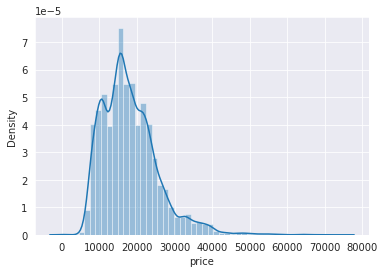

In [246]:
sns.distplot(df.price);

In [247]:
df.vat.value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

In [248]:
df.km.value_counts(dropna=False)

10 km        1045
- km         1024
1 km          367
5 km          170
50 km         148
             ... 
67,469 km       1
43,197 km       1
10,027 km       1
35,882 km       1
57 km           1
Name: km, Length: 6690, dtype: int64

In [249]:
df["km"] = df.km.str.replace(',', '').str.extract('(\d{1,8})').astype('float') 

In [250]:
df.km.value_counts(dropna=False)

10.00       1045
NaN         1024
1.00         367
5.00         170
50.00        148
            ... 
67469.00       1
43197.00       1
10027.00       1
35882.00       1
57.00          1
Name: km, Length: 6690, dtype: int64

In [251]:
df.registration.value_counts(dropna=False)

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
11/2019       1
12/2019       1
Name: registration, dtype: int64

In [252]:
df["First_Registration"].astype('str').value_counts(dropna=False)

['\n', '2018', '\n']    4522
['\n', '2016', '\n']    3674
['\n', '2017', '\n']    3273
['\n', '2019', '\n']    2853
nan                     1597
Name: First_Registration, dtype: int64

In [253]:
df['First_Registration'] = df['First_Registration'].str[1].astype('float')

In [254]:
df["First_Registration"].value_counts(dropna=False)

2018.00    4522
2016.00    3674
2017.00    3273
2019.00    2853
NaN        1597
Name: First_Registration, dtype: int64

In [255]:
df['age'] = 2019 - df['First_Registration']

In [256]:
df.age.value_counts(dropna=False)

1.00    4522
3.00    3674
2.00    3273
0.00    2853
NaN     1597
Name: age, dtype: int64

In [257]:
df.drop(["registration", "First_Registration"], axis=1, inplace=True)

In [258]:
df.prev_owner.value_counts(dropna=False)

1 previous owner     8294
NaN                  6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [259]:
df["Previous_Owners"].astype('str').value_counts(dropna=False)

\n1\n                                                                                                        8101
nan                                                                                                          6640
\n2\n                                                                                                         766
\n0\n                                                                                                         163
\n3\n                                                                                                          17
                                                                                                             ... 
['\n1\n', '\n111 g CO2/km (comb)\n']                                                                            1
['\n1\n', '\nEuro 6\n']                                                                                         1
['\n2\n', '\n119 g CO2/km (comb)\n']                                                    

In [260]:
df["Previous_Owners"] = [item[0] if type(item) == list else item for item in df["Previous_Owners"]]
df["Previous_Owners"]

0        \n2\n
1          NaN
2        \n1\n
3        \n1\n
4        \n1\n
         ...  
15914      NaN
15915    \n1\n
15916    \n1\n
15917      NaN
15918    \n1\n
Name: Previous_Owners, Length: 15919, dtype: object

In [261]:
df["Previous_Owners2"] = df["Previous_Owners"].apply(lambda item: item[0] if type(item) == list else item)
df["Previous_Owners2"]

0        \n2\n
1          NaN
2        \n1\n
3        \n1\n
4        \n1\n
         ...  
15914      NaN
15915    \n1\n
15916    \n1\n
15917      NaN
15918    \n1\n
Name: Previous_Owners2, Length: 15919, dtype: object

In [262]:
df["Previous_Owners"] = df["Previous_Owners"].str.strip("\n").astype('float')

In [263]:
df["Previous_Owners"].value_counts(dropna=False)

1.00    8294
NaN     6640
2.00     778
0.00     188
3.00      17
4.00       2
Name: Previous_Owners, dtype: int64

In [264]:
df["prev_owner"] = df["prev_owner"].str.extract("(\d*)").astype('float')

In [265]:
df["prev_owner"].value_counts(dropna=False)

1.00    8294
NaN     6828
2.00     778
3.00      17
4.00       2
Name: prev_owner, dtype: int64

In [266]:
df["Previous_Owners"].fillna(df["prev_owner"], inplace=True) 

In [267]:
df["Previous_Owners"].value_counts(dropna=False)

1.00    8294
NaN     6640
2.00     778
0.00     188
3.00      17
4.00       2
Name: Previous_Owners, dtype: int64

In [268]:
df[(df["Previous_Owners"].isna()) & (df["prev_owner"].notna())]#.value_counts()

,make_model,body_type,price,vat,km,prev_owner,hp,Type,Previous_Owners,Next_Inspection,Inspection_new,Warranty,Full-Service,Non_smoking_Vehicle,Offer_Number,Body_Color,Paint_Type,Body_Color_Original,Upholstery,Nr._of_Doors,Nr._of_Seats,Model_Code,Gearing_Type,Displacement,Cylinders,Weight,Drive_chain,Fuel,Consumption,CO2_Emission,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,description,Emission_Label,Gears,Country_version,age,Previous_Owners2


In [269]:
df.drop(["prev_owner", "Previous_Owners", "Previous_Owners2"], axis=1, inplace=True)

In [270]:
df.hp.value_counts(dropna=False)

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
70 kW      888
125 kW     707
51 kW      695
55 kW      569
118 kW     516
92 kW      466
121 kW     392
147 kW     380
77 kW      345
56 kW      286
54 kW      276
103 kW     253
87 kW      232
165 kW     194
88 kW      177
60 kW      160
162 kW      98
- kW        88
74 kW       81
96 kW       72
71 kW       59
101 kW      47
67 kW       40
154 kW      39
122 kW      35
119 kW      30
164 kW      27
135 kW      24
82 kW       22
52 kW       22
78 kW       20
1 kW        20
294 kW      18
146 kW      18
141 kW      16
57 kW       10
104 kW       8
120 kW       8
191 kW       7
112 kW       7
155 kW       6
117 kW       6
184 kW       5
90 kW        4
76 kW        4
65 kW        4
149 kW       3
80 kW        3
168 kW       3
98 kW        3
93 kW        3
228 kW       2
270 kW       2
53 kW        2
140 kW       2
86 kW        2
167 kW       2
127 kW       2
89 kW        2
143 kW       2
63 kW        2
40 kW     

In [271]:
df["hp_kW"] = df.hp.str.extract('(\d{1,4})').astype('float')

In [272]:
df.hp_kW.value_counts(dropna=False)

85.00     2542
66.00     2122
81.00     1402
100.00    1308
110.00    1112
70.00      888
125.00     707
51.00      695
55.00      569
118.00     516
92.00      466
121.00     392
147.00     380
77.00      345
56.00      286
54.00      276
103.00     253
87.00      232
165.00     194
88.00      177
60.00      160
162.00      98
NaN         88
74.00       81
96.00       72
71.00       59
101.00      47
67.00       40
154.00      39
122.00      35
119.00      30
164.00      27
135.00      24
82.00       22
52.00       22
78.00       20
1.00        20
294.00      18
146.00      18
141.00      16
57.00       10
104.00       8
120.00       8
191.00       7
112.00       7
155.00       6
117.00       6
184.00       5
90.00        4
76.00        4
65.00        4
149.00       3
80.00        3
168.00       3
98.00        3
93.00        3
228.00       2
270.00       2
53.00        2
140.00       2
86.00        2
167.00       2
127.00       2
89.00        2
143.00       2
63.00        2
40.00     

In [273]:
df.drop('hp', axis=1, inplace=True)

In [274]:
df.Type.astype('str').value_counts()

['', 'Used', '', 'Diesel (Particulate Filter)']                                                                                 3475
['', 'Used', '', 'Diesel']                                                                                                      2516
['', 'Used', '', 'Gasoline']                                                                                                    2367
['', 'Used', '', 'Super 95']                                                                                                    1818
['', 'Pre-registered', '', 'Super 95']                                                                                           500
                                                                                                                                ... 
['', 'New', '', 'Regular/Benzine 91 / Super 95 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98 / Super E10 95']       1
['', 'Used', '', 'Super 95 / Super Plus 98 / Super E10 95 / Super Plu

In [275]:
df["Type"] = df.Type.str[1]

In [276]:
df["Next_Inspection"].astype('str').value_counts(dropna=False)

nan                                           12384
\n04/2022\n                                      62
\n03/2021\n                                      38
\n03/2022\n                                      36
\n06/2021\n                                      34
                                              ...  
['\n12/2018\n', '\n97 g CO2/km (comb)\n']         1
['\n03/2022\n', '\n1 (No sticker)\n']             1
['\n05/2021\n', '\n93 g CO2/km (comb)\n']         1
['\n06/2021\n', '\n93 g CO2/km (comb)\n']         1
['\n01/2022\n', '\n168 g CO2/km (comb)\n']        1
Name: Next_Inspection, Length: 1400, dtype: int64

In [277]:
df["Inspection_new"].astype('str').value_counts(dropna=False)

nan                                                                                                            11987
['\nYes\n', '\nEuro 6\n']                                                                                        523
\nYes\n                                                                                                          362
['\nYes\n', '\n102 g CO2/km (comb)\n']                                                                           174
['\nYes\n', '\n4 (Green)\n']                                                                                     166
                                                                                                               ...  
['\nYes\n', '\n', '6 l/100 km (comb)', '\n', '8 l/100 km (city)', '\n', '4.9 l/100 km (country)', '\n']            1
['\nYes\n', '\n', '6.8 l/100 km (comb)', '\n', '8.5 l/100 km (city)', '\n', '6.1 l/100 km (country)', '\n']        1
['\nYes\n', '\n', '4.1 l/100 km (comb)', '\n', '7.5 l/100 km (ci

In [278]:
df["Inspection_new"] = [item[0] if type(item) == list else item for item in df["Inspection_new"]]

df["Inspection_new"] = df["Inspection_new"].str.strip("\n")

In [279]:
df["Inspection_new"].value_counts(dropna=False)

NaN    11987
Yes     3932
Name: Inspection_new, dtype: int64

In [280]:
df.drop(["Next_Inspection", "Inspection_new"], axis=1, inplace=True)

In [281]:
df.Warranty.astype('str').value_counts(dropna=False)

nan                                                                                                                5420
['\n', '\n', '\nEuro 6\n']                                                                                         1868
\n12 months\n                                                                                                      1177
\n                                                                                                                  979
\n24 months\n                                                                                                       566
                                                                                                                   ... 
['\n72 months\n', '\n125 g CO2/km (comb)\n']                                                                          1
['\n60 months\n', '\n14 g CO2/km (comb)\n']                                                                           1
['\n24 months\n', '\n121 g CO2/km (comb)

In [282]:
df["Warranty"] = df.Warranty.apply(lambda x : x[0] if type(x)==list else x)
df["Warranty"] = df.Warranty.str.strip("\n").str.extract('(\d{1,2})').astype("float")

In [283]:
df.Warranty.value_counts(dropna=False)

NaN      11066
12.00     2594
24.00     1118
60.00      401
36.00      279
48.00      149
6.00       125
72.00       59
3.00        33
23.00       11
18.00       10
20.00        7
25.00        6
2.00         5
50.00        4
26.00        4
16.00        4
4.00         3
1.00         3
19.00        3
34.00        3
13.00        3
28.00        2
22.00        2
14.00        2
11.00        2
46.00        2
21.00        2
9.00         2
17.00        2
45.00        2
33.00        1
40.00        1
65.00        1
10.00        1
15.00        1
7.00         1
8.00         1
56.00        1
49.00        1
47.00        1
30.00        1
Name: Warranty, dtype: int64

In [284]:
df.drop('Full-Service', axis=1, inplace=True)

In [285]:
df['Non_smoking_Vehicle']

0                       [\n, \n]
1                            NaN
2                            NaN
3           [\n, \n, \nEuro 6\n]
4                       [\n, \n]
                  ...           
15914                        NaN
15915    [\n, \n, \n4 (Green)\n]
15916                   [\n, \n]
15917                        NaN
15918                        NaN
Name: Non_smoking_Vehicle, Length: 15919, dtype: object

In [286]:
df['Non_smoking_Vehicle'].astype('str').value_counts(dropna=False)

nan                                                                                                             8742
['\n', '\n']                                                                                                    3647
['\n', '\n', '\n4 (Green)\n']                                                                                   1240
['\n', '\n', '\nEuro 6\n']                                                                                      1127
['\n', '\n', '\nEuro 6d-TEMP\n']                                                                                 345
\n                                                                                                                70
['\n', '\n', '\n120 g CO2/km (comb)\n']                                                                           63
['\n', '\n', '\n85 g CO2/km (comb)\n']                                                                            46
['\n', '\n', '\n104 g CO2/km (comb)\n']                         

In [287]:
df.drop("Non_smoking_Vehicle", axis=1, inplace=True)

In [288]:
df['Offer_Number'].astype('str').value_counts(dropna=False)

nan                                                 3175
['\nLT67679\n']                                       27
['\nUN89904\n']                                       27
['\nXJ38068\n']                                       27
['\nJV03654\n']                                       27
                                                    ... 
['\n160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b\n']       1
['\n6701576\n']                                        1
['\n6701569\n']                                        1
['\n158121\n']                                         1
['\nRe_30000008029\n']                                 1
Name: Offer_Number, Length: 11441, dtype: int64

In [289]:
df.drop("Offer_Number", axis=1, inplace=True)

In [290]:
df['Body_Color'].astype('str').value_counts(dropna=False)

['\n', 'Black', '\n']     3745
['\n', 'Grey', '\n']      3505
['\n', 'White', '\n']     3406
['\n', 'Silver', '\n']    1647
['\n', 'Blue', '\n']      1431
['\n', 'Red', '\n']        957
nan                        597
['\n', 'Brown', '\n']      289
['\n', 'Green', '\n']      154
['\n', 'Beige', '\n']      108
['\n', 'Yellow', '\n']      51
['\n', 'Violet', '\n']      18
['\n', 'Bronze', '\n']       6
['\n', 'Orange', '\n']       3
['\n', 'Gold', '\n']         2
Name: Body_Color, dtype: int64

In [291]:
df.drop("Body_Color", axis=1, inplace=True)

In [292]:
df['Body_Color_Original']

0                 [\nMythosschwarz\n]
1                                 NaN
2        [\nmythosschwarz metallic\n]
3                                 NaN
4        [\nMythosschwarz Metallic\n]
                     ...             
15914              [\nGrigio scuro\n]
15915       [\nStahl-Grau Metallic\n]
15916               [\narktis-weiß\n]
15917                    [\nGrigio\n]
15918    [\nTitanium-Grau Metallic\n]
Name: Body_Color_Original, Length: 15919, dtype: object

In [293]:
df['Body_Color_Original'].astype('str').value_counts(dropna=False)

nan                                      3759
['\nOnyx Schwarz\n']                      338
['\nBianco\n']                            282
['\nMythosschwarz Metallic\n']            238
['\nBrillantschwarz\n']                   216
                                         ... 
['\nRouge-Braun (G0Y)\n']                   1
['\nVARI COLRI DISPONIBILI\n']              1
['\nKokosnussbraun Metallic\n']             1
['\nFarbe frei wählbar\n']                  1
['\nPerlmutt-Weiß Metallic (Weiß)\n']       1
Name: Body_Color_Original, Length: 1928, dtype: int64

In [294]:
df.drop("Body_Color_Original", axis=1, inplace=True)

In [295]:
df['Paint_Type'].astype('str').value_counts(dropna=False)

['\nMetallic\n']       9794
nan                    5772
['\nUni/basic\n']       347
['\nPerl effect\n']       6
Name: Paint_Type, dtype: int64

In [296]:
df['Paint_Type'] = df['Paint_Type'].str[0].str.strip('\n')

In [297]:
df['Paint_Type'].value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: Paint_Type, dtype: int64

In [298]:
df.drop("Paint_Type", axis=1, inplace=True)

In [299]:
df['Upholstery'].astype('str').value_counts(dropna=False)

['\nCloth, Black\n']           5821
nan                            3720
['\nPart leather, Black\n']    1121
['\nCloth\n']                  1005
['\nCloth, Grey\n']             891
['\nCloth, Other\n']            639
['\nFull leather, Black\n']     575
['\nBlack\n']                   491
['\nGrey\n']                    273
['\nOther, Other\n']            182
['\nPart leather\n']            140
['\nFull leather\n']            139
['\nFull leather, Brown\n']     116
['\nPart leather, Grey\n']      116
['\nOther, Black\n']            110
['\nFull leather, Other\n']      72
['\nFull leather, Grey\n']       67
['\nPart leather, Other\n']      65
['\nOther\n']                    56
['\nPart leather, Brown\n']      50
['\nalcantara, Black\n']         47
['\nVelour, Black\n']            36
['\nFull leather, Beige\n']      36
['\nCloth, Brown\n']             28
['\nVelour\n']                   16
['\nOther, Grey\n']              15
['\nCloth, Beige\n']             13
['\nBrown\n']               

In [300]:
df["Upholstery"] = [item[0] if type(item) == list else item for item in df.Upholstery]

In [301]:
df["Upholstery"].value_counts(dropna=False)

\nCloth, Black\n           5821
NaN                        3720
\nPart leather, Black\n    1121
\nCloth\n                  1005
\nCloth, Grey\n             891
\nCloth, Other\n            639
\nFull leather, Black\n     575
\nBlack\n                   491
\nGrey\n                    273
\nOther, Other\n            182
\nPart leather\n            140
\nFull leather\n            139
\nFull leather, Brown\n     116
\nPart leather, Grey\n      116
\nOther, Black\n            110
\nFull leather, Other\n      72
\nFull leather, Grey\n       67
\nPart leather, Other\n      65
\nOther\n                    56
\nPart leather, Brown\n      50
\nalcantara, Black\n         47
\nVelour, Black\n            36
\nFull leather, Beige\n      36
\nCloth, Brown\n             28
\nVelour\n                   16
\nOther, Grey\n              15
\nCloth, Beige\n             13
\nBrown\n                    12
\nCloth, Blue\n              12
\nVelour, Grey\n              8
\nCloth, White\n              8
\nalcant

In [302]:
df["Upholstery"] = df.Upholstery.str.strip("\n").str.split(", ")

In [303]:
df["Upholstery"].astype('str').value_counts(dropna=False)

['Cloth', 'Black']           5821
nan                          3720
['Part leather', 'Black']    1121
['Cloth']                    1005
['Cloth', 'Grey']             891
['Cloth', 'Other']            639
['Full leather', 'Black']     575
['Black']                     491
['Grey']                      273
['Other', 'Other']            182
['Part leather']              140
['Full leather']              139
['Full leather', 'Brown']     116
['Part leather', 'Grey']      116
['Other', 'Black']            110
['Full leather', 'Other']      72
['Full leather', 'Grey']       67
['Part leather', 'Other']      65
['Other']                      56
['Part leather', 'Brown']      50
['alcantara', 'Black']         47
['Velour', 'Black']            36
['Full leather', 'Beige']      36
['Cloth', 'Brown']             28
['Velour']                     16
['Other', 'Grey']              15
['Cloth', 'Beige']             13
['Brown']                      12
['Cloth', 'Blue']              12
['Velour', 'Gr

In [304]:
u_type = ["Cloth", 'Part leather', 'Full leather', 'Velour', 'alcantara']
df["Upholstery_type"] = df["Upholstery"].apply(lambda x : x[0] if type(x) == list and x[0] in u_type else np.nan)

In [305]:
df["Upholstery_type"].value_counts(dropna=False)

Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: Upholstery_type, dtype: int64

In [306]:
color = ['Black', 'Grey', 'Brown', 'Beige', 'White', 'Blue', 'Red', 'Yellow', 'Orange']

def color_finder(x):
    if type(x) == list and len(x) == 2:
        return x[1]
    elif type(x) == list and x[0] in color:
        return x[0]
    else:
        return np.nan
    
df['Upholstery_color'] = df.Upholstery.apply(color_finder)

In [307]:
df["Upholstery_color"].value_counts(dropna=False)

Black     8201
NaN       5078
Grey      1376
Other      960
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: Upholstery_color, dtype: int64

In [308]:
df.drop("Upholstery", axis=1, inplace=True)

In [309]:
df["Nr._of_Doors"].astype('str').value_counts(dropna=False)

['\n5\n']    11575
['\n4\n']     3079
['\n3\n']      832
['\n2\n']      219
nan            212
['\n1\n']        1
['\n7\n']        1
Name: Nr._of_Doors, dtype: int64

In [310]:
df['Nr_of_Doors'] = df['Nr._of_Doors'].str[0].str.strip('\n').astype('float')

In [311]:
df["Nr_of_Doors"].value_counts(dropna=False)

5.00    11575
4.00     3079
3.00      832
2.00      219
NaN       212
1.00        1
7.00        1
Name: Nr_of_Doors, dtype: int64

In [312]:
df.drop("Nr._of_Doors", axis=1, inplace=True)

In [313]:
df["Nr._of_Seats"].astype('str').value_counts(dropna=False)

['\n5\n']    13336
['\n4\n']     1125
nan            977
['\n7\n']      362
['\n2\n']      116
['\n6\n']        2
['\n3\n']        1
Name: Nr._of_Seats, dtype: int64

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Warranty             4853 non-null   float64
 7   Nr._of_Seats         14942 non-null  object 
 8   Model_Code           4978 non-null   object 
 9   Gearing_Type         15919 non-null  object 
 10  Displacement         15423 non-null  object 
 11  Cylinders            10239 non-null  object 
 12  Weight               8945 non-null   object 
 13  Drive_chain          9061 non-null   object 
 14  Fuel                 15919 non-null  object 
 15  Consumption          14013 non-null 

In [315]:
df["Model_Code"].astype('str').value_counts(dropna=False)

nan                 10941
['\n0035/BCB\n']      268
['\n0588/BNO\n']      245
['\n0588/BDB\n']      206
['\n0588/BHX\n']      188
                    ...  
['\n0035/AVN\n']        1
['\n0035/BEM\n']        1
['\n0035/BAG\n']        1
['\n0035/BAA\n']        1
['\n3333/BKG\n']        1
Name: Model_Code, Length: 233, dtype: int64

In [316]:
df.drop("Model_Code", axis=1, inplace=True)

In [317]:
df["Gearing_Type"].astype('str').value_counts(dropna=False)

['\n', 'Manual', '\n']            8153
['\n', 'Automatic', '\n']         7297
['\n', 'Semi-automatic', '\n']     469
Name: Gearing_Type, dtype: int64

In [318]:
df.drop("Gearing_Type", axis=1, inplace=True)

In [319]:
df["Displacement"].astype('str').value_counts(dropna=False)

['\n1,598 cc\n']     4761
['\n999 cc\n']       2438
['\n1,398 cc\n']     1314
['\n1,399 cc\n']      749
['\n1,229 cc\n']      677
['\n1,956 cc\n']      670
['\n1,461 cc\n']      595
['\n1,490 cc\n']      559
nan                   496
['\n1,422 cc\n']      467
['\n1,197 cc\n']      353
['\n898 cc\n']        351
['\n1,395 cc\n']      320
['\n1,968 cc\n']      301
['\n1,149 cc\n']      288
['\n1,618 cc\n']      212
['\n1,798 cc\n']      210
['\n1,498 cc\n']      196
['\n1,600 cc\n']      130
['\n1,248 cc\n']      110
['\n1,997 cc\n']      103
['\n1,364 cc\n']      102
['\n1,400 cc\n']       90
['\n998 cc\n']         72
['\n1,500 cc\n']       50
['\n2,000 cc\n']       46
['\n1,000 cc\n']       40
['\n1 cc\n']           36
['\n1,998 cc\n']       25
['\n2,480 cc\n']       20
['\n1,200 cc\n']       18
['\n1,984 cc\n']       18
['\n1,397 cc\n']       11
['\n899 cc\n']         11
['\n160 cc\n']          6
['\n929 cc\n']          5
['\n1,499 cc\n']        5
['\n997 cc\n']          4
['\n1,596 cc

In [320]:
df["Displacement_cc"] = df.Displacement.str[0].str.strip('\n').str.replace(',', '').str.extract('(\d{1,5})').astype("float")

In [321]:
df["Displacement_cc"].value_counts(dropna=False)

1598.00     4761
999.00      2438
1398.00     1314
1399.00      749
1229.00      677
1956.00      670
1461.00      595
1490.00      559
NaN          496
1422.00      467
1197.00      353
898.00       351
1395.00      320
1968.00      301
1149.00      288
1618.00      212
1798.00      210
1498.00      196
1600.00      130
1248.00      110
1997.00      103
1364.00      102
1400.00       90
998.00        72
1500.00       50
2000.00       46
1000.00       40
1.00          36
1998.00       25
2480.00       20
1200.00       18
1984.00       18
1397.00       11
899.00        11
160.00         6
929.00         5
1499.00        5
997.00         4
1596.00        4
139.00         4
900.00         4
1599.00        3
1199.00        3
1396.00        3
1495.00        2
1589.00        2
1300.00        2
2.00           2
995.00         2
1496.00        1
890.00         1
1580.00        1
1995.00        1
1333.00        1
54.00          1
1533.00        1
1100.00        1
1350.00        1
16000.00      

In [322]:
df.drop("Displacement", axis=1, inplace=True)

In [326]:
df["Cylinders"].astype('str').value_counts(dropna=False)

['\n4\n']    8105
nan          5680
['\n3\n']    2104
['\n5\n']      22
['\n6\n']       3
['\n8\n']       2
['\n2\n']       2
['\n1\n']       1
Name: Cylinders, dtype: int64

In [327]:
df["Cylinders"] = df.Cylinders.str[0].str.strip('\n').astype("float")

In [328]:
df["Cylinders"].value_counts(dropna=False)

4.00    8105
NaN     5680
3.00    2104
5.00      22
6.00       3
8.00       2
2.00       2
1.00       1
Name: Cylinders, dtype: int64

In [329]:
df["Weight"].astype('str').value_counts(dropna=False)

nan                 6974
['\n1,163 kg\n']     574
['\n1,360 kg\n']     356
['\n1,165 kg\n']     301
['\n1,335 kg\n']     242
                    ... 
['\n1,960 kg\n']       1
['\n1,258 kg\n']       1
['\n1,167 kg\n']       1
['\n1,331 kg\n']       1
['\n2,037 kg\n']       1
Name: Weight, Length: 435, dtype: int64

In [330]:
df["Weight_kg"] = df.Weight.str[0].str.strip('\n').str.replace(',', '').str.extract('(\d{1,6})').astype('float')

In [331]:
df["Weight_kg"].value_counts(dropna=False)

NaN        6974
1163.00     574
1360.00     356
1165.00     301
1335.00     242
           ... 
1960.00       1
1258.00       1
1167.00       1
1331.00       1
2037.00       1
Name: Weight_kg, Length: 435, dtype: int64

In [332]:
df.drop("Weight", axis=1, inplace=True)

In [335]:
df["Drive_chain"].astype('str').value_counts(dropna=False)

['\nfront\n']    8886
nan              6858
['\n4WD\n']       171
['\nrear\n']        4
Name: Drive_chain, dtype: int64

In [337]:
df["Drive_chain"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nfront\n]    8886
NaN            6858
[\n4WD\n]       171
[\nrear\n]        4
Name: Drive_chain, dtype: int64

In [338]:
df["Fuel"].astype('str').value_counts(dropna=False)

['\n', 'Diesel (Particulate Filter)', '\n']                                                                                                       4315
['\n', 'Super 95', '\n']                                                                                                                          3338
['\n', 'Gasoline', '\n']                                                                                                                          3175
['\n', 'Diesel', '\n']                                                                                                                            2984
['\n', 'Super 95 / Regular/Benzine 91', '\n']                                                                                                      424
['\n', 'Regular/Benzine 91', '\n']                                                                                                                 354
['\n', 'Super E10 95', '\n']                                                                  

In [339]:
df["Fuel"] = df.Fuel.str[1].str.split("/").str[0].str.strip()

In [340]:
df["Fuel"].value_counts(dropna=False)

Diesel (Particulate Filter)          4315
Super 95                             4100
Gasoline                             3175
Diesel                               2984
Regular                               503
Super E10 95                          402
Super 95 (Particulate Filter)         268
Gasoline (Particulate Filter)          77
CNG                                    33
LPG                                    16
Super Plus 98                          11
Liquid petroleum gas (LPG)             10
Super E10 95 (Particulate Filter)       7
Electric                                5
Others                                  5
CNG (Particulate Filter)                3
Super Plus E10 98                       2
Others (Particulate Filter)             1
Biogas                                  1
Domestic gas H                          1
Name: Fuel, dtype: int64

In [341]:
df["Fuel"] = df.Fuel.str.split("(").str[0].str.strip()

In [342]:
df["Fuel"].value_counts(dropna=False)

Diesel                  7299
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10 98          2
Biogas                     1
Domestic gas H             1
Name: Fuel, dtype: int64

In [343]:
benzine = ["Gasoline", "Super 95", "Regular", "Super E10 95", "Super Plus 98", "Super Plus E10 98", "Others"]
lpg = ["LPG", "Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]

def fueltype(x):
    if x in benzine:
        return "Benzine"
    elif x in lpg:
        return "LPG/CNG"
    else:
        return x

df["Fuel"] = df.Fuel.apply(fueltype)

In [344]:
df.Fuel.value_counts(dropna=False)

Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64

In [347]:
df[df.Fuel == "Electric"][["make_model", "body_type", "CO2_Emission", "Gears", "hp_kW", "Consumption", "price"]]

,make_model,body_type,CO2_Emission,Gears,hp_kW,Consumption,price
3356,Audi A3,Compact,NaN,[\n6\n],150.00,NaN,24950
3612,Audi A3,Sedans,[\n36 g CO2/km (comb)\n],[\n6\n],110.00,"[\n, 1.6 l/100 km (comb), \n, \n, \n]",38450
3615,Audi A3,Sedans,[\n36 g CO2/km (comb)\n],[\n6\n],110.00,"[\n, 1.6 l/100 km (comb), \n, \n, \n]",35899
3617,Audi A3,Sedans,[\n36 g CO2/km (comb)\n],[\n6\n],110.00,"[\n, 1.6 l/100 km (comb), \n, \n, \n]",38000
13397,Renault Clio,Sedans,"[[], [], []]",NaN,NaN,NaN,8490


In [346]:
df["Consumption"].astype('str').value_counts(dropna=False)

nan                                                                                                 1906
[['3.9 l/100 km (comb)'], ['4.1 l/100 km (city)'], ['3.7 l/100 km (country)']]                       304
[['4.2 l/100 km (comb)'], ['5 l/100 km (city)'], ['3.7 l/100 km (country)']]                         276
[['5.4 l/100 km (comb)'], ['6.8 l/100 km (city)'], ['4.5 l/100 km (country)']]                       257
[['3.8 l/100 km (comb)'], ['4.3 l/100 km (city)'], ['3.5 l/100 km (country)']]                       253
                                                                                                    ... 
[['4.2 l/100 km (comb)'], ['5.3 l/100 km (city)'], ['3.6 l/100 km (country)']]                         1
['\n', '5.1 l/100 km (comb)', '\n', '6.4 l/100 km (city)', '\n', '4.3 l/100 km (country)', '\n']       1
[['4.6 l/100 km (comb)'], ['5.4 l/100 km (city)'], ['6.7 l/100 km (country)']]                         1
['\n', '6.3 l/100 km (comb)', '\n', '\n', '\n']        

In [348]:
# Ortalama yakit
def cons_comb(x):
    
    if type(x)==list and len(x)==3:
        if x[0] != []: return x[0][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return x[1]
    
    if type(x)==list and len(x)==7:
        return x[1]
    
    else:
        return None


In [349]:
def cons_city(x):
    
    if type(x)==list and len(x)==3:
        if x[1] != []: return x[1][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return None
    
    if type(x)==list and len(x)==7:
        return x[3]
    
    else:
        return None


In [350]:
def cons_country(x):
    
    if type(x)==list and len(x)==3:
        if x[2] != []: return x[2][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return None
    
    if type(x)==list and len(x)==7:
        return x[5]
    
    else:
        return None

In [351]:
def cons_country(x):
    
    if type(x)==list and len(x)==3:
        if x[2] != []: return x[2][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return None
    
    if type(x)==list and len(x)==7:
        return x[5]
    
    else:
        return None

In [352]:
df['cons_comb'] = df.Consumption.apply(cons_comb).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float") 
df['cons_city'] = df.Consumption.apply(cons_city).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float")
df['cons_country'] = df.Consumption.apply(cons_country).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float")

In [353]:
df["cons_comb"].value_counts(dropna=False).head()

NaN     2033
5.40     770
3.90     733
4.00     713
5.10     657
Name: cons_comb, dtype: int64

In [354]:
df["cons_city"].value_counts(dropna=False).head()

NaN     2436
5.00     669
5.80     633
4.50     580
4.30     533
Name: cons_city, dtype: int64

In [355]:
df["cons_country"].value_counts(dropna=False).head()

NaN     2376
4.20    1178
3.70    1089
4.40     898
4.50     848
Name: cons_country, dtype: int64

In [356]:
df.drop('Consumption', axis=1,inplace=True)

In [358]:
df["CO2_Emission"].astype('str').value_counts(dropna=False)

nan                              1808
['\n120 g CO2/km (comb)\n']       740
[[], [], []]                      628
['\n99 g CO2/km (comb)\n']        545
['\n97 g CO2/km (comb)\n']        537
                                 ... 
['\n14 g CO2/km (comb)\n']          1
['\n1,060 g CO2/km (comb)\n']       1
['\n51 g CO2/km (comb)\n']          1
['\n165 g CO2/km (comb)\n']         1
['\n193 g CO2/km (comb)\n']         1
Name: CO2_Emission, Length: 124, dtype: int64

In [361]:
df["CO2_Emission"] = df['CO2_Emission'].str[0].str.strip().str.replace(',', '').str.extract('(\d+)').astype('float')

In [362]:
df["CO2_Emission"].value_counts(dropna=False)

NaN        2436
120.00      740
99.00       545
97.00       537
104.00      501
           ... 
14.00         1
1060.00       1
51.00         1
165.00        1
193.00        1
Name: CO2_Emission, Length: 123, dtype: int64

In [363]:
df.drop("CO2_Emission", axis=1, inplace=True)

In [365]:
df["Emission_Class"].astype('str').value_counts(dropna=False)

['\nEuro 6\n']          10139
nan                      3021
['\nEuro 6d-TEMP\n']     1845
[[], [], []]              607
['\nEuro 6c\n']           127
['\nEuro 5\n']             78
['\nEuro 6d\n']            62
['\nEuro 4\n']             40
Name: Emission_Class, dtype: int64

In [367]:
df["Emission_Class"] = [item[0] if type(item) == list else item for item in df["Emission_Class"]]
df["Emission_Class"] = df["Emission_Class"].str.strip("\n")

In [368]:
df["Emission_Class"].value_counts(dropna=False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: Emission_Class, dtype: int64

In [369]:
df.replace({"Emission_Class" : {"Euro 6d-TEMP": "Euro 6", "Euro 6c": "Euro 6", "Euro 6d": "Euro 6"}}, regex=True, inplace=True)

In [370]:
df["Emission_Class"].value_counts(dropna=False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: Emission_Class, dtype: int64

In [372]:
df.drop("Emission_Class", axis=1, inplace=True)

In [373]:
df["Emission_Label"].astype('str').value_counts(dropna=False)

nan                       11934
['\n4 (Green)\n']          3553
['\n1 (No sticker)\n']      381
[[], [], []]                 40
['\n5 (Blue)\n']              8
['\n3 (Yellow)\n']            2
['\n2 (Red)\n']               1
Name: Emission_Label, dtype: int64

In [374]:
df.drop("Emission_Label", axis=1, inplace=True)

In [375]:
df["Gears"].astype('str').value_counts(dropna=False)

['\n6\n']     5822
nan           4712
['\n5\n']     3239
['\n7\n']     1908
['\n8\n']      224
['\n9\n']        6
['\n1\n']        2
['\n3\n']        2
['\n4\n']        2
['\n2\n']        1
['\n50\n']       1
Name: Gears, dtype: int64

In [376]:
df["Gears"] = df.Gears.str[0].str.strip('\n')

In [377]:
df["Gears"].value_counts(dropna=False)

6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
50        1
Name: Gears, dtype: int64

In [379]:
df["Country_version"].astype('str').value_counts(dropna=False)

nan                       8333
['\nGermany\n']           4502
['\nItaly\n']             1038
['\nEuropean Union\n']     507
['\nNetherlands\n']        464
['\nSpain\n']              325
['\nBelgium\n']            314
['\nAustria\n']            208
['\nCzech Republic\n']      52
['\nPoland\n']              49
['\nFrance\n']              38
['\nDenmark\n']             33
['\nHungary\n']             28
['\nJapan\n']                8
['\nSlovakia\n']             4
['\nCroatia\n']              4
['\nSweden\n']               3
['\nRomania\n']              2
['\nBulgaria\n']             2
['\nLuxembourg\n']           1
['\nSwitzerland\n']          1
['\nSlovenia\n']             1
['\nEgypt\n']                1
['\nSerbia\n']               1
Name: Country_version, dtype: int64

In [380]:
df.drop("Country_version", axis=1, inplace=True)

In [381]:
df["Comfort_Convenience"].astype('str').value_counts(dropna=False).head()

nan                                                                                                                                                                                                                                                                                                                                                                                                       920
['Air conditioning', 'Electrical side mirrors', 'Hill Holder', 'Power windows']                                                                                                                                                                                                                                                                                                                           216
['Air conditioning', 'Electrical side mirrors', 'Power windows']                                                                                                                                            

In [382]:
df["Comfort_Convenience"] = [",".join(item) if type(item) == list else item for item in df["Comfort_Convenience"]]

In [383]:
df["Comfort_Convenience"].value_counts(dropna=False).head()

NaN                                                                                                                                                                                                                                                                                                                                                   920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                    216
Air conditioning,Electrical side mirrors,Power windows                                                                                                                                                                                                                                                              

In [384]:
df["Entertainment_Media"].astype('str').value_counts(dropna=False).head()

nan                                                                                               1374
['Bluetooth', 'Hands-free equipment', 'On-board computer', 'Radio', 'USB']                        1282
['Bluetooth', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 'USB']                  982
['Bluetooth', 'CD player', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 'USB']     783
['On-board computer', 'Radio']                                                                     487
Name: Entertainment_Media, dtype: int64

In [385]:
df["Entertainment_Media"] = [",".join(item) if type(item) == list else item for item in df["Entertainment_Media"]]

In [386]:
df["Entertainment_Media"].value_counts(dropna=False).head()

NaN                                                                         1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                  1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB               982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB     783
On-board computer,Radio                                                      487
Name: Entertainment_Media, dtype: int64

In [387]:
df["Extras"].astype('str').value_counts(dropna=False).head()

['Alloy wheels']                                     3245
nan                                                  2962
['Alloy wheels', 'Touch screen']                      697
['Alloy wheels', 'Voice Control']                     577
['Alloy wheels', 'Touch screen', 'Voice Control']     541
Name: Extras, dtype: int64

In [388]:
df["Extras"] = [",".join(item) if type(item) == list else item for item in df["Extras"]]

In [389]:
df["Extras"].value_counts(dropna=False).head()

Alloy wheels                               3245
NaN                                        2962
Alloy wheels,Touch screen                   697
Alloy wheels,Voice Control                  577
Alloy wheels,Touch screen,Voice Control     541
Name: Extras, dtype: int64

In [390]:
df["Safety_Security"].astype('str').value_counts(dropna=False).head()

nan                                                                                                                                                                                                                                                                                                   982
['ABS', 'Central door lock', 'Daytime running lights', 'Driver-side airbag', 'Electronic stability control', 'Fog lights', 'Immobilizer', 'Isofix', 'Passenger-side airbag', 'Power steering', 'Side airbag', 'Tire pressure monitoring system', 'Traction control']                                  538
['ABS', 'Central door lock', 'Daytime running lights', 'Driver-side airbag', 'Electronic stability control', 'Immobilizer', 'Isofix', 'Passenger-side airbag', 'Power steering', 'Side airbag', 'Tire pressure monitoring system', 'Traction control']                                                480
['ABS', 'Central door lock', 'Daytime running lights', 'Driver-side airbag', 'Electronic stability control

In [391]:
df["Safety_Security"] = [",".join(item) if type(item) == list else item for item in df["Safety_Security"]]

In [392]:
df["Safety_Security"].value_counts(dropna=False).head()

NaN                                                                                                                                                                                                                                                        982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                               538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                          480
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights         

In [398]:
df.to_csv("clean_scout.csv", index=False)